In [1]:
import numpy as np
import cv2
from skimage import io, color, filters
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt
from logging import exception

In [2]:
def carregar_imagem():
    try:
        from google.colab import files
        uploaded = files.upload()
        # Assuming only one file is uploaded, get the filename and content
        filename = list(uploaded.keys())[0]
        img_bytes = uploaded[filename]
        # Read the image from bytes using OpenCV
        img = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)
        return img
    except Exception as e:
        print(f"Erro ao carregar imagem: {e}")
        return None

In [3]:
def borda_sobel(img):
    sobel_x = filters.sobel_h(img)
    sobel_y = filters.sobel_v(img)
    borda = np.hypot(sobel_x, sobel_y)
    borda = (borda / borda.max()) * 255
    return borda.astype(np.uint8)

In [4]:
def borda_roberts(img):
    roberts_borda = filters.roberts(img)
    roberts_borda = (roberts_borda / roberts_borda.max()) * 255
    return roberts_borda.astype(np.uint8)

In [5]:
def exibir_metadados(img, filename):
    try:
        altura, largura = img.shape[:2]
        tipo_arquivo = os.path.splitext(filename)[1].lower()
        tamanho_bytes = img.nbytes # Approximating size based on numpy array bytes

        print("===== Metadados da Imagem =====")
        print(f"Resolução: {largura} x {altura}")
        print(f"Tamanho aproximado em bytes: {tamanho_bytes}")
        print(f"Tipo de arquivo: {tipo_arquivo}")
        print("================================")
    except Exception as e:
        print(f"Erro ao exibir metadados: {e}")

Digite a quantidade de imagens que deseja carregar: 2

Processando ...


Saving imagem1.jpg to imagem1 (1).jpg
===== Metadados da Imagem =====
Resolução: 900 x 600
Tamanho aproximado em bytes: 1620000
Tipo de arquivo: .jpg


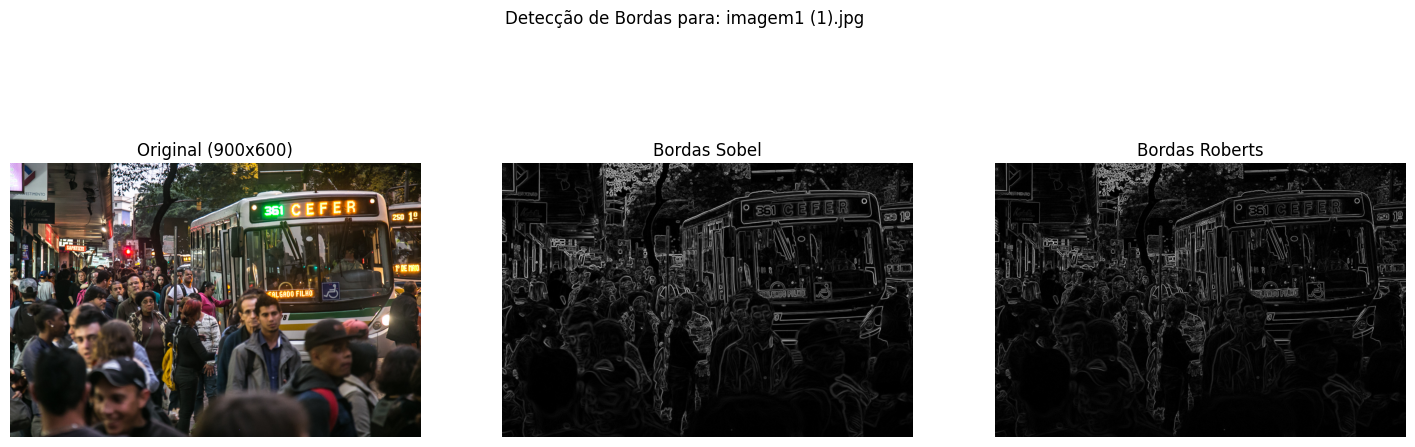


Processando ...


Saving imagem2.jpg to imagem2.jpg
===== Metadados da Imagem =====
Resolução: 275 x 183
Tamanho aproximado em bytes: 150975
Tipo de arquivo: .jpg


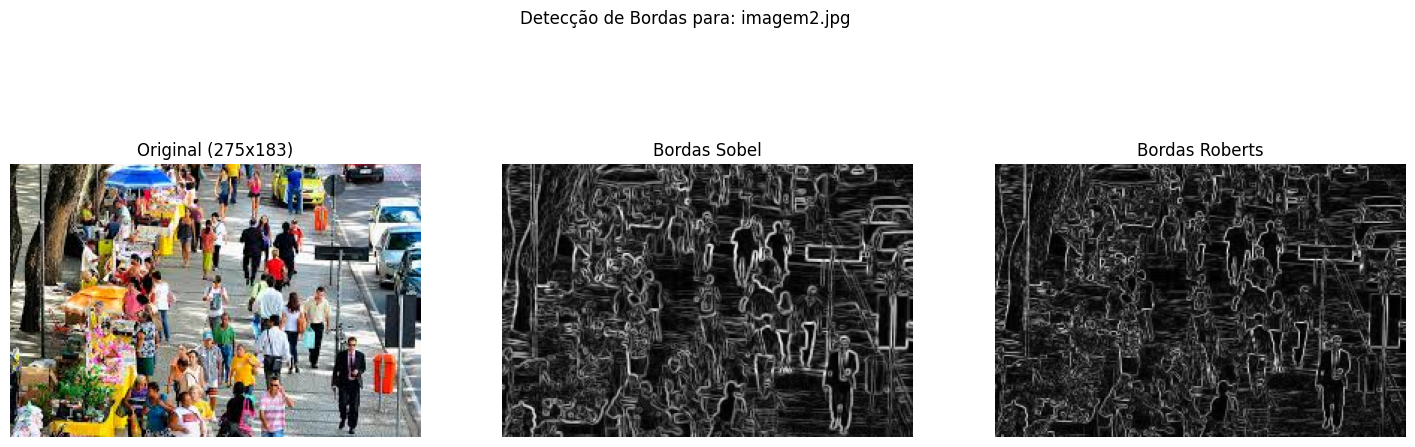

In [8]:
if __name__ == "__main__":
    class ErroTipoImagemInvalido(Exception):
      """Excecao para imagens com tipos de arquivo invalidos"""
      pass

    try:
      escolha = int(input("Digite a quantidade de imagens que deseja carregar: "))

      if escolha < 1 or type(escolha) != int:
        raise TypeError

      for i in range(escolha):
          print("\nProcessando ...")
          from google.colab import files
          uploaded = files.upload()
          filename = list(uploaded.keys())[0]

          extencoes_permitidas = ['.png', '.jpg', '.jpeg']
          extensao_arquivo = os.path.splitext(filename)[1].lower()
          if extensao_arquivo not in extencoes_permitidas:
              raise ErroTipoImagemInvalido(f"Tipo de arquivo inválido: {extensao_arquivo}. Por favor, carregue um arquivo .png, .jpg ou .jpeg.")

          img_bytes = uploaded[filename]
          img = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)

          if img is not None:
              img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

              exibir_metadados(img, filename)

              img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
              img_processada = img_gray

              sobel_img = borda_sobel(img_processada)
              roberts_img = borda_roberts(img_processada)

              fig, axes = plt.subplots(1, 3, figsize=(18, 6))
              ax = axes.ravel()

              ax[0].imshow(img_rgb)
              ax[0].set_title(f"Original ({img.shape[1]}x{img.shape[0]})")

              ax[1].imshow(sobel_img, cmap='gray')
              ax[1].set_title("Bordas Sobel")

              ax[2].imshow(roberts_img, cmap='gray')
              ax[2].set_title("Bordas Roberts")

              for a in ax:
                  a.axis('off')

              plt.suptitle(f"Detecção de Bordas para: {filename}")
              plt.show()
    except TypeError:
      print("Digite um numero inteiro, positivo e maior que 0!")
    except IndexError:
      print("Carregamento de arquivos cancelado!")
    except ErroTipoImagemInvalido:
      print("Tipo de arquivo invalido! Insira um arquivo .png, .jpg ou .jpeg")